<br><br>

<center><u><font size="5" color="blue">Correlation of oil prices and the CPI/PPI</font></u></center>


<br>

First of all, lets note the subtle difference between the CPI and the PPI

<br>



<b><u>CPI</u></b>  :   measures the cost of goods and services to consumers 


<b><u>PPI</u></b>  :   measures the cost of the output that goes directly to consumers  

<b><u>Inflation Rate</u></b>  :  the rate in which the index move 


<br><br>

<pre>
			
			CPI includes rent PPI does not
			CPI includes medical services paid for directly by consumers however
			PPI includes medical services sold to the servicers
            
</pre>
            

The U.S. BUREAU OF LABOR STATISTICS has a good article on the differences [here](https://www.bls.gov/ppi/methodology-reports/comparing-the-producer-price-index-for-personal-consumption-with-the-us-all-items-cpi-for-all-urban-consumers.htm) 

<br><br>

The actual number is ratio to the average of goods and services from 1982 to 1984 with a reference base of 100.

<br>

There are many CPIs and PPIs but we can calculate the actual inflation rate by taking the delta of any 2 and dividing by the first.

<br>


In [6]:
def calculate_inflation_rate(prev, current):
    return "%{:.3}".format( (current-prev)/prev  * 100 ) 


calculate_inflation_rate(271,294)

'%8.49'

<br>

Here we download oil prices automatically from the U.S. Energy Administration.

<br>

In [7]:
# import requests
URL = "https://www.eia.gov/dnav/pet/hist_xls/RWTCm.xls"
# response = requests.get(URL)

from urllib import request
response = request.urlretrieve(URL, "oil_prices.xls")

In [8]:
import os
os.getcwd()

'C:\\Users\\arono\\source\\python\\DATA618'

In [22]:
import pandas as pd 
file="oil_prices.xls"

oil_prices = pd.read_excel(file, sheet_name='Data 1')


In [23]:
oil_prices=oil_prices.iloc[4:443,:]
oil_prices.columns = ['date', 'price']
oil_prices.reset_index(drop=True, inplace=True)

In [24]:
oil_prices.iloc[0:5,:]

,date,price
0,1986-03-15 00:00:00,12.61
1,1986-04-15 00:00:00,12.84
2,1986-05-15 00:00:00,15.38
3,1986-06-15 00:00:00,13.43
4,1986-07-15 00:00:00,11.59


<br>

I didnt find a direct download but you can manually pull CPI historical data from these 2 sites

[Monthly Data](https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008)

<br>

[Yearly Averages](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-)


<br>


In [34]:
file_name='CPI.xlsx'

df = pd.read_excel(file_name, header=1)


df.head()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
0,1913.0,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
1,1914.0,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1,1
2,1915.0,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2,1
3,1916.0,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
4,1917.0,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4


In [37]:
df2=df.iloc[:,1:13]    # select colomns Jan thru Dec
df3=df2.to_numpy().flatten()    # flatten to a numpy array
df4 = pd.DataFrame(df3)
#  to start in March 1986, get rid of 73 years + 2 months
start=73*12+2
cpi=df4.iloc[start:1316,:]

In [43]:
cpi.columns = ['cpi_index'] 
cpi.reset_index(drop=True, inplace=True)

In [44]:
oil_cpi_df = pd.concat([oil_prices, cpi['cpi_index']], axis="columns")

In [45]:
oil_cpi_df.head()

,date,price,cpi_index
0,1986-03-15 00:00:00,12.61,108.8
1,1986-04-15 00:00:00,12.84,108.6
2,1986-05-15 00:00:00,15.38,108.9
3,1986-06-15 00:00:00,13.43,109.5
4,1986-07-15 00:00:00,11.59,109.5


<br>

CPI as we see, is a lot less volatile than the price of oil alone.

<br>

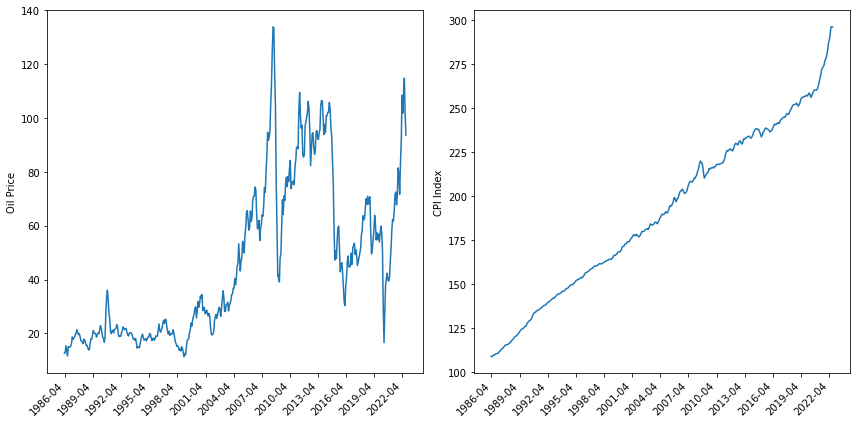

In [57]:

import matplotlib as mpl 
import matplotlib.pyplot as plt 

months_3_Loc = mpl.dates.MonthLocator(interval=36)
xFmt = mpl.dates.DateFormatter('%Y-%m')


fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, tight_layout=True, figsize=(12, 6))

ax[0].plot_date(oil_cpi_df.date,oil_cpi_df.price, '-' )
ax[0].xaxis.set_major_locator(months_3_Loc) 
ax[0].xaxis.set_minor_formatter(xFmt)  
ax[0].set(ylabel="Oil Price", xlabel='')
ax[0].set_title('Price of Oil')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')  # have to force the rotation here

ax[1].plot_date(oil_cpi_df.date,oil_cpi_df.cpi_index, '-' )
ax[1].xaxis.set_major_locator(months_3_Loc) 
ax[1].xaxis.set_minor_formatter(xFmt)  
ax[1].set(ylabel="CPI Index", xlabel='')
ax[1].set_title('CPI Index')

plt.xticks(rotation = 45, ha='right') 

plt.show()


In [62]:
oil_cpi_df['price'] = oil_cpi_df.price.astype(float)
oil_cpi_df["price"].corr(oil_cpi_df["cpi_index"])

0.7497761623397062

<br>

If you start playing with time periods, the correlation number varies

<br>

In [77]:
oil_cpi_df.iloc[219:437,1].corr(oil_cpi_df.iloc[219:437,2])

0.0011917465918747916

In [117]:
oil_cpi_df.iloc[0:300,1].corr(oil_cpi_df.iloc[0:300,2])

0.8044820509862992

In [112]:
from datetime import datetime

start = datetime.strptime("1990-01-01","%Y-%m-%d")
end = datetime.strptime("2000-01-01","%Y-%m-%d")
mask = (oil_cpi_df['date']  > start) & (oil_cpi_df['date']  <= end)
the_nineties = oil_cpi_df.loc[mask]
the_nineties["price"].corr(the_nineties["cpi_index"])

-0.3330267361784557

In [113]:
start = datetime.strptime("1980-01-01","%Y-%m-%d")
end = datetime.strptime("1990-01-01","%Y-%m-%d")
mask = (oil_cpi_df['date']  > start) & (oil_cpi_df['date']  <= end)
the_eighties = oil_cpi_df.loc[mask]
the_eighties["price"].corr(the_eighties["cpi_index"])

0.5290107639184654

In [114]:
start = datetime.strptime("2000-01-01","%Y-%m-%d")
mask = (oil_cpi_df['date']  > start) 
the_2000s = oil_cpi_df.loc[mask]
the_2000s["price"].corr(the_2000s["cpi_index"])

0.4442101966763914


<b><u>Conclusion</u></b>  :  


<br><br>

<pre>
			
			The correlation is strong, but there are a lot of caveats. 
            
            The article makes some sensible points. For example, the economy is more service driven now.
            
            It didnt really try to explain why oil inflation causes general inflation or vica versa.
            
            It seems to me oil inflation occurs more by choice of the OPEC leaders than by supply chain dynamics,
               at least compared to general inflation. And it makes sense that when oil prices increase, it
                   drives a wide range of inflationary pressures.
            
            
</pre>